<a href="https://colab.research.google.com/github/genebene11/gwc-image-recognition/blob/main/GWC_CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"genesisbenedith","key":"c766886236ec6430f7365baa1b5ef89f"}'}

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

-rw-r--r-- 1 root root 71 Apr 20 19:04 kaggle.json


In [4]:
!pwd
!kaggle datasets list
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

/content
ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38           3237         66  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                                   3KB  2024-03-02 18:50:30          30101        580  0.9411765        
nayanack/netflix                                       Netflix Chronicles: Exploring Movies and TV Shows     1MB  2024-04-16 07:36:08           1067         23  0.88235295       
sunnykakar/spotify-charts-all-audio-data               Spotify Charts (All Audio Data)          

In [5]:
!unzip microsoft-catsvsdogs-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [7]:
print(os.getcwd())
Image_Directory = 'PetImages/';
Filetype = '.jpg';

SIZE = 64 #going to resize all images to 64x64 size
dataset = [] #going to save dataset in a list format.
label = []  #Stores labels for images (0 for cat, 1 for dog)

for pet in range(2):
  if pet == 0:
    pet_string = 'Cat/';
    pet_label = 0; # if we have a cat image, label it 0
  else:
    pet_string = 'Dog/';
    pet_label = 1; # if we have a dog image, label it 1
  for num in range(100):
          Filedir = Image_Directory+pet_string+str(num)+Filetype;
          image = cv2.imread(Filedir)
          print(Filedir)
          image = Image.fromarray(image, 'RGB')
          image = image.resize((SIZE, SIZE)) # resizing to 64x64
          dataset.append(np.array(image)) # add image to "dataset"
          label.append(pet_label) # add image label to "label"

/content
PetImages/Cat/0.jpg
PetImages/Cat/1.jpg
PetImages/Cat/2.jpg
PetImages/Cat/3.jpg
PetImages/Cat/4.jpg
PetImages/Cat/5.jpg
PetImages/Cat/6.jpg
PetImages/Cat/7.jpg
PetImages/Cat/8.jpg
PetImages/Cat/9.jpg
PetImages/Cat/10.jpg
PetImages/Cat/11.jpg
PetImages/Cat/12.jpg
PetImages/Cat/13.jpg
PetImages/Cat/14.jpg
PetImages/Cat/15.jpg
PetImages/Cat/16.jpg
PetImages/Cat/17.jpg
PetImages/Cat/18.jpg
PetImages/Cat/19.jpg
PetImages/Cat/20.jpg
PetImages/Cat/21.jpg
PetImages/Cat/22.jpg
PetImages/Cat/23.jpg
PetImages/Cat/24.jpg
PetImages/Cat/25.jpg
PetImages/Cat/26.jpg
PetImages/Cat/27.jpg
PetImages/Cat/28.jpg
PetImages/Cat/29.jpg
PetImages/Cat/30.jpg
PetImages/Cat/31.jpg
PetImages/Cat/32.jpg
PetImages/Cat/33.jpg
PetImages/Cat/34.jpg
PetImages/Cat/35.jpg
PetImages/Cat/36.jpg
PetImages/Cat/37.jpg
PetImages/Cat/38.jpg
PetImages/Cat/39.jpg
PetImages/Cat/40.jpg
PetImages/Cat/41.jpg
PetImages/Cat/42.jpg
PetImages/Cat/43.jpg
PetImages/Cat/44.jpg
PetImages/Cat/45.jpg
PetImages/Cat/46.jpg
PetImages/Cat/

This is an image of a dog


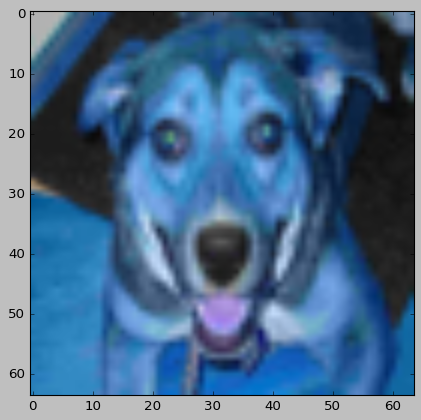

In [10]:
# Show a resized image
num = 199; # 0 to 99 for cat images, 100 to 199 for dog images
Sample_Image = dataset[num]
plt.imshow(Sample_Image)
if label[num] == 0:
  print('This is an image of a cat.')
else:
  print('This is an image of a dog.')
# You should see the image has been resized to 64x64

In [11]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)
# so 40 out of 200 of the images will be used to test the AI model

#Without scaling (normalize) the training may not converge.
#Normalization is a rescaling of the data from the original range
#so that all values are within the range of 0 and 1.
from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [12]:
# we have 200 images in total, 160 training images and 40 testing images
# index is in range 0 to 159 for training, 0 to 39 for testing
index = 159;
print("Check that training images have been normalized:")
print(X_train[index])

index = 39;
print("Check that testing images have been normalized:")
print(X_test[index])

# You should see the images are now normalized to 0 to 1

Check that training images have been normalized:
[[[0.1778025  0.18925514 0.19777005]
  [0.17713269 0.18844576 0.19731407]
  [0.17288876 0.1854137  0.19467643]
  ...
  [0.14595151 0.14667891 0.13438738]
  [0.24585584 0.23892951 0.2200532 ]
  [0.25075447 0.2374737  0.21943625]]

 [[0.1281018  0.13858841 0.15477656]
  [0.12064549 0.13502806 0.17012512]
  [0.11412025 0.12797181 0.15328853]
  ...
  [0.15789299 0.15879001 0.14994803]
  [0.24940184 0.23525367 0.22135529]
  [0.24277592 0.22117649 0.20595134]]

 [[0.10570148 0.09835307 0.09536738]
  [0.10600066 0.10312583 0.10409482]
  [0.10933676 0.1039771  0.10500264]
  ...
  [0.16983448 0.16820976 0.16267947]
  [0.23758185 0.23157783 0.22395947]
  [0.20402295 0.2025511  0.19859593]]

 ...

 [[0.11620163 0.11698054 0.11490987]
  [0.11715863 0.11796408 0.11574723]
  [0.11753702 0.11851935 0.11803217]
  ...
  [0.16320032 0.16148137 0.16267947]
  [0.14183991 0.14213242 0.14583408]
  [0.12879661 0.12921363 0.13117139]]

 [[0.11480161 0.11549034 